In [1]:
from base import EnsembleNetwork
from operator import itemgetter
import numpy as np
import networks
import progressbar
import time


AI GRIDSEARCH? THOMSPON SAMPLING? HUH?


In [2]:
import dataset_creation
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]
import pprint
pp = pprint.PrettyPrinter(indent=4)

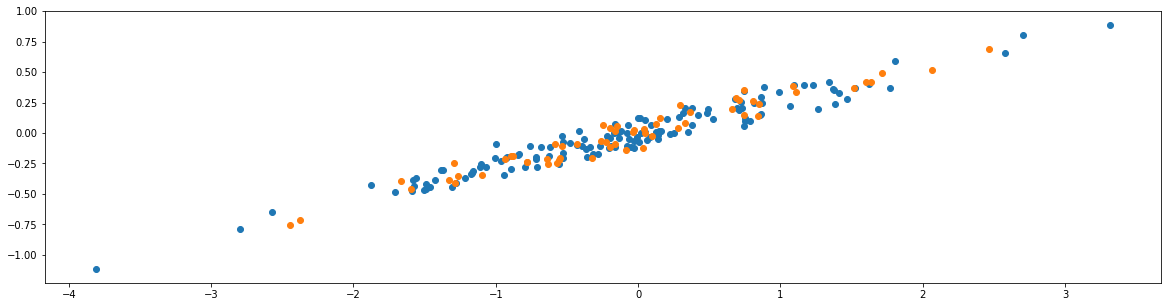

In [3]:
seed = 50
ds = dataset_creation.LinearDataset(seed=50)
X_train,y_train = ds.train_dataset
X_test,y_test = ds.test_dataset
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

from sklearn.grid_search import ParameterGrid

trials = 10

num_neurons = [[2,3,2],[10,10,10],[1,1,1]]
seeds = [50,100,150]
num_layers = len(num_neurons[0])
learning_rates = [0.1,0.01,0.001]
activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             'learning_rate':learning_rates,
             'seed':seeds,
             'l2':[True,False]}
             

grid = ParameterGrid(param_grid)
score_listvanilla = []

#for i in progressbar.progressbar(range(100)):

for params in grid:
    start_time = time.time()
    scores = []
    for i in range(trials):
        net = EnsembleNetwork(**params)
        net.fit(X_train,y_train)
        scores.append(net.score(X_test,y_test))
    score = np.mean(scores)
    var = np.var(scores)
    score_listvanilla.append({'params':params,
                      'score':score,
                      'var':var})
    end_time = time.time()
    print('took {} seconds ({} minutes)'.format(end_time-start_time,(end_time-start_time)/60))
    
score_listvanilla = sorted(score_listvanilla, key=itemgetter('score'), reverse=False)
pp.pprint(score_listvanilla[0])
pp.pprint(score_listvanilla[-1])
#plt.plot(scores)

from sklearn.grid_search import ParameterGrid




grid = ParameterGrid(param_grid)
score_listdropout = []
for params in grid:
    scores = []
    for i in range(trials):
        net = networks.DropoutNetwork(**params)
        net.fit(X_train,y_train)
        scores.append(net.score(X_test,y_test))
    score = np.mean(scores)
    var = np.var(scores)
    score_listdropout.append({'params':params,
                      'score':score,
                      'var':var})
    
score_listdropout = sorted(score_listdropout, key=itemgetter('score'), reverse=False)
pp.pprint(score_listdropout[0])
pp.pprint(score_listdropout[-1])


In [22]:
from sklearn.grid_search import ParameterGrid

trials = 5

num_neurons = [[10,10,10],[2,3,2]]#[[2,3,2],[10,10,10],[5,10,5],[10,5,10]]
seeds = [1000,1500],#[50,100,150,200]
num_layers = len(num_neurons[0])
learning_rates = [0.1,0.001]#[0.1,0.01,0.001]
l2 = [True,False]
activation_schemes = [tf.nn.tanh,tf.nn.leaky_relu,tf.sigmoid]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activation_schemes':activation_schemes,
             'initialisation_schemes':initialisation_schemes,
             'learning_rates':learning_rates,
             'seeds':seeds,
             'l2':l2,
              'trials':trials}



grid = ParameterGrid(param_grid)

In [23]:
import ensembles
import importlib
importlib.reload(ensembles)
import evaluation

gridsearched_parameters/model_classbase_EnsembleNetwork_classdataset_creation_LinearDataset
162
experiment started at 2018-08-11 11:04:01.440164. Doing 10 trials each for 162 combinations
took 51.179412841796875 seconds (0.8529902140299479 minutes) to do 0 out of 162. Overall, estimated time is: 829.1064880371093 minutes
took 52.06246995925903 seconds (0.8677078326543172 minutes) to do 1 out of 162. Overall, estimated time is: 831.0971565485 minutes
took 47.32855987548828 seconds (0.788809331258138 minutes) to do 2 out of 162. Overall, estimated time is: 803.042360941569 minutes
took 46.888184785842896 seconds (0.7814697464307149 minutes) to do 3 out of 162. Overall, estimated time is: 784.8980441629886 minutes
took 46.9589569568634 seconds (0.78264928261439 minutes) to do 4 out of 162. Overall, estimated time is: 772.3595667648316 minutes
took 46.83477997779846 seconds (0.780579666296641 minutes) to do 5 out of 162. Overall, estimated time is: 762.1103535056114 minutes
took 46.1132202

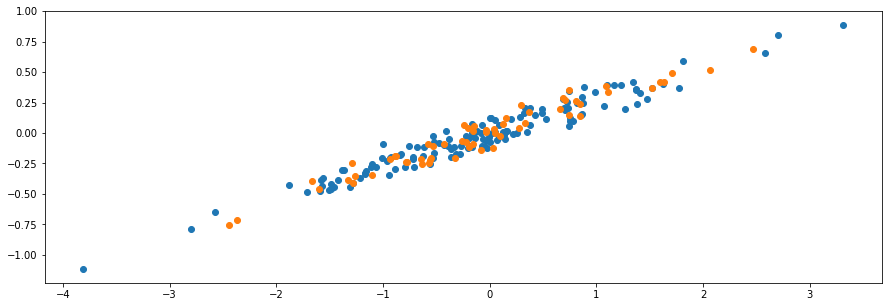

In [25]:
score_lis_ensemblet = evaluation.gridsearch(EnsembleNetwork,dataset_creation.LinearDataset)#,**param_grid)

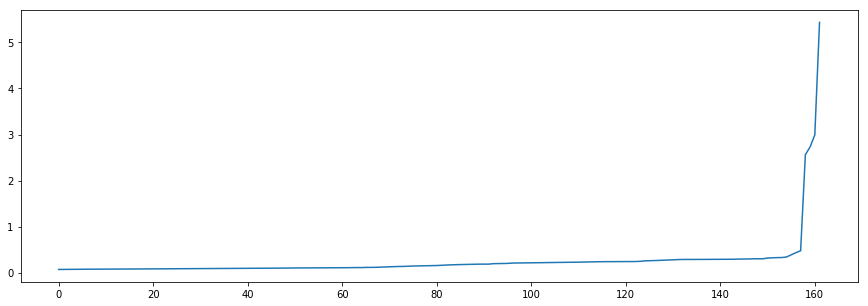

In [26]:
scores_ens = [x['score'] for x in score_lis_ensemblet]
plt.plot(scores_ens)

In [13]:
import ensembles
importlib.reload(ensembles)


<module 'ensembles' from '/Users/thomas/Documents/Master-Thesis/new_version/ensembles.py'>

gridsearched_parameters/model_classensembles_BootstrapThroughTimeBobStrap_classdataset_creation_LinearDataset
162
experiment started at 2018-08-11 12:55:22.295170. Doing 10 trials each for 162 combinations
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
took 620.1388611793518 seconds (10.33564768632253 minutes) to do 0 out of 162. Overall, estimated time is: 10046.249551105499 minutes
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
took 667.9838540554047 seconds (11.133064234256745 minutes) to do 1 out of 162. Overall, estimated t

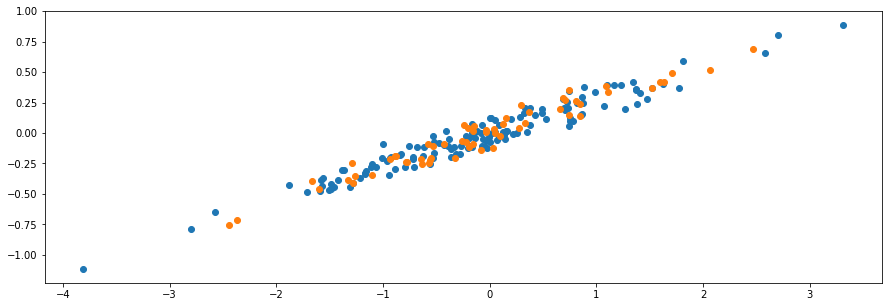

In [27]:
score_lis_boot = evaluation.gridsearch(ensembles.BootstrapThroughTimeBobStrap,dataset_creation.LinearDataset)

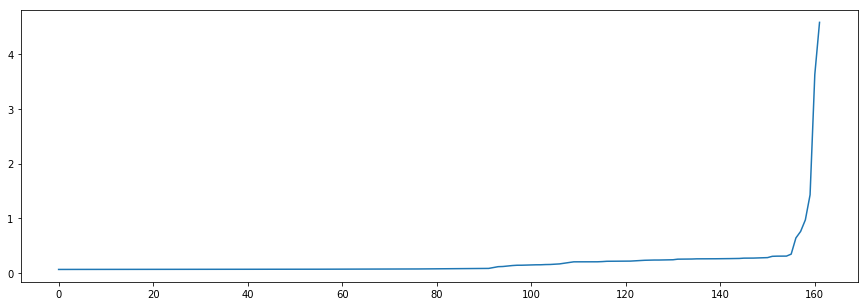

In [28]:
scores_boottt = [x['score'] for x in score_lis_boot]
plt.plot(scores_boottt)

gridsearched_parameters/model_classensembles_ForcedDiversityBootstrapThroughTime3_classdataset_creation_LinearDataset
162
experiment started at 2018-08-12 10:12:59.290327. Doing 10 trials each for 162 combinations
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
took 25.23082995414734 seconds (0.42051383256912234 minutes) to do 0 out of 162. Overall, estimated time is: 408.7394452571869 minutes
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
doing a burn in of 3 epochs
took 25.03765106201172 seconds (0.417294184366862 minutes) to do 1 out of 162. Overall, est

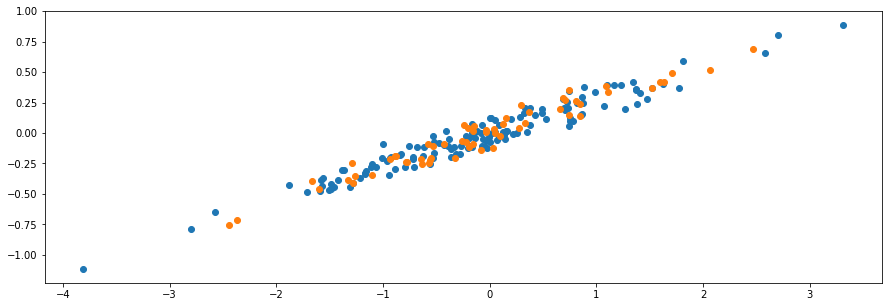

In [29]:
score_lis_forced = evaluation.gridsearch(ensembles.ForcedDiversityBootstrapThroughTime3,dataset_creation.LinearDataset)

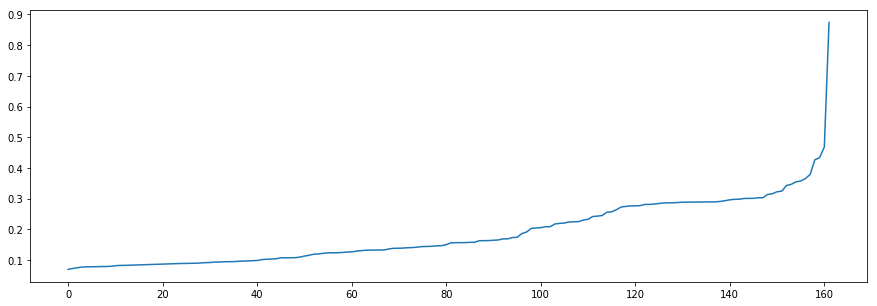

In [30]:
scores_forced = [x['score'] for x in score_lis_forced]
plt.plot(scores_forced)

In [ ]:
score_list_nlod = evaluation.gridsearch(networks.NlpdNetwork,dataset_creation.LinearDataset)

gridsearched_parameters/model_classnetworks_NlpdNetwork_classdataset_creation_LinearDataset
162
experiment started at 2018-08-12 11:23:04.333124. Doing 10 trials each for 162 combinations
took 110.30586004257202 seconds (1.8384310007095337 minutes) to do 0 out of 162. Overall, estimated time is: 1786.9549326896667 minutes
took 65.80865693092346 seconds (1.0968109488487243 minutes) to do 1 out of 162. Overall, estimated time is: 1417.7218616366386 minutes
took 79.56985688209534 seconds (1.3261642813682557 minutes) to do 2 out of 162. Overall, estimated time is: 1363.6499938964844 minutes
took 79.70353293418884 seconds (1.328392215569814 minutes) to do 3 out of 162. Overall, estimated time is: 1333.166929489374 minutes
took 73.06912088394165 seconds (1.2178186813990275 minutes) to do 4 out of 162. Overall, estimated time is: 1290.7242074489593 minutes
took 70.6112060546875 seconds (1.1768534342447916 minutes) to do 5 out of 162. Overall, estimated time is: 1253.5618782560032 minutes
took

In [ ]:
scores_nlpd = [x['score'] for x in score_list_nlod]
plt.plot(scores_nlpd)

In [ ]:
score_list_lr = evaluation.gridsearch(networks.LrNetwork,dataset_creation.LinearDataset)

In [ ]:

score_lr = [x['score'] for x in score_list_lr]
plt.plot(score_lr)




# NLPD and LR

In [ ]:
score_list = evaluation.gridsearch(networks.NlpdNetwork,dataset_creation.LinearDataset)

In [ ]:
score_list = evaluation.gridsearch(networks.LrNetwork,dataset_creation.LinearDataset)

# Nonlinear


In [ ]:
from sklearn.grid_search import ParameterGrid

trials = 10

num_neurons = [[2,3,2],[10,10,10],[5,10,5],[10,5,10]]
seeds = [50,100,150,200]
num_layers = len(num_neurons[0])
learning_rates = [0.1,0.01,0.001]
activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             'learning_rate':learning_rates,
             'seed':seeds,
             'l2':[True,False]}
             
    
    

l2 = [True,False]
activation_schemes = [tf.nn.tanh,tf.nn.leaky_relu,tf.sigmoid]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activation_schemes':activation_schemes,
             'initialisation_schemes':initialisation_schemes,
             'learning_rates':learning_rates,
             'seeds':seeds,
             'l2':l2,
              'trials':trials}
             

grid = ParameterGrid(param_grid)

In [ ]:
trials = 10

num_neurons = [[10,10,10],[5,10,5],[10,5,10]]
seeds = [50,100,150,200]
num_layers = len(num_neurons[0])
learning_rates = [0.1,0.01,0.001]
activations = [[tf.nn.tanh]*num_layers,[tf.nn.leaky_relu]*num_layers, [tf.sigmoid]*num_layers]
initialisation_schemes = [tf.keras.initializers.he_normal, tf.contrib.layers.xavier_initializer] 
param_grid = {'num_neurons': num_neurons,
              'activations':activations,
             'initialisation_scheme':initialisation_schemes,
             'learning_rate':learning_rates,
             'seed':seeds,
             'l2':[True,False]}
             
    
    

In [ ]:
score_list = evaluation.gridsearch(networks.DropoutNetwork,dataset_creation.NonlinearDataset,**dropout_param_grid)

In [ ]:

score_lr = [x['score'] for x in score_list]
plt.plot(score_lr)
